In [1]:
# Run this if running in Google Collab
# Mount google drive if running from Google Collab
from google.colab import drive
drive.mount('/content/drive')

# Set current directory if running from Google Collab

import os
os.chdir('/content/drive/My Drive/RL_smart_grid/Outputs')

Mounted at /content/drive


In [2]:
!pip install matplotlib==3.1.1

     |████████████████████████████████| 13.1MB 218kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# %matplotlib inline

# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

!pip show matplotlib
!pip3 install l2rpn_baselines
import grid2op

Name: matplotlib
Version: 3.1.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, kiwisolver, cycler, numpy, pyparsing
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz
     |████████████████████████████████| 174kB 11.4MB/s 
     |████████████████████████████████| 11.7MB 210kB/s 
     |████████████████████████████████| 9.5MB 34.4MB/s 
     |████████████████████████████████| 5.8MB 27.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 153kB 43.9MB/s 
     |████████████████████████████████| 3.2MB 29.2MB/s 
  Created wheel for l2rpn-baselines: filename=l2rpn_baselines-0.5.1-cp37-none-any.whl size=246282 sha256

In [21]:
env = grid2op.make()

/usr/local/lib/python3.7/dist-packages/grid2op/MakeEnv/Make.py:329: UserWarning: It is the first time you use the environment "rte_case14_realistic".
We will attempt to download this environment from remote
  warnings.warn(_MAKE_FIRST_TIME_WARN.format(dataset_name))
rte_case14_realistic.tar.bz2: 0.00B [00:00, ?B/s]

downloading the training data, this may take a while.


rte_case14_realistic.tar.bz2: 292MB [00:09, 31.1MB/s]                           


Extract the tar archive in "/root/data_grid2op"
You may now use the environment "rte_case14_realistic" with the available data by invoking:
	env = grid2op.make("rte_case14_realistic")


In [22]:
obs = env.reset()

In [27]:
env.observation_space.n

429

In [25]:
obs

In [6]:
# Set parameters
eval_nb_episode = 10 
eval_max_steps = -1 
train_iters = [500000] # TO-DO: Modify this!!

# DQN

In [ ]:
# Import relevant modules
from l2rpn_baselines.DoubleDuelingDQN import train
from l2rpn_baselines.DoubleDuelingDQN import evaluate

In [ ]:
# Models to evaluate
models = [0,1,2,3,4.1]

In [ ]:
# Initialize object to store experiment results
ddqqn_experiment_results = np.zeros((eval_nb_episode, len(models)))

for j, i in enumerate(models): 
  dddqn_base_save_path = "./dddqn_trained_models_{}".format(i)

  env.reset()

  # Evaluate the model
  eval_results = evaluate(env, nb_episode=eval_nb_episode, verbose=False,
                          load_path=dddqn_base_save_path + "/DoubleDuelingDQN.h5", max_steps=eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results]

  # Assign current score to the actual output array
  ddqqn_experiment_results[:,j] = scores

Successfully loaded network from: ./dddqn_trained_models_0/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_1/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_3/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_4.1/DoubleDuelingDQN.h5


In [ ]:
ddqqn_experiment_results

NameError: ignored

In [ ]:
dddqn_means = np.mean(ddqqn_experiment_results, axis = 0)
dddqn_means

# DRQN

In [6]:
# Import relevant modules
from l2rpn_baselines.DoubleDuelingRDQN import train
from l2rpn_baselines.DoubleDuelingRDQN import evaluate

In [7]:
# Models to evaluate
models = [4]

In [8]:
dddrqn_experiment_results = np.zeros((eval_nb_episode, len(models)))

for j, i in enumerate(models): # Írjuk be kézzel mert nem minden esetben kell a teljes folyamat)

  dddrqn_base_save_path = "./dddrqn_trained_models_{}".format(i)

  env.reset()
  
  # Evaluate the model
  eval_results = evaluate(env, nb_episode=eval_nb_episode, verbose=False,
                          load_path=dddrqn_base_save_path + "/DoubleDuelingRDQN.tf", max_steps=eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results]

  # Assign current score to the actual output array
  dddrqn_experiment_results[:,j] = scores

Successfully loaded network from: ./dddrqn_trained_models_4/DoubleDuelingRDQN.tf


In [9]:
dddrqn_experiment_results

array([[ 889394.625 ],
       [1485846.    ],
       [1189344.375 ],
       [ 908805.125 ],
       [ 912720.25  ],
       [ 590318.25  ],
       [1805206.25  ],
       [1188923.875 ],
       [1192194.75  ],
       [3158348.    ],
       [1214299.125 ],
       [ 920369.25  ],
       [ 609441.3125],
       [ 882456.25  ],
       [ 917420.3125],
       [3609428.5   ],
       [ 898180.125 ],
       [1226888.25  ],
       [ 593067.9375],
       [ 603387.625 ]])

In [ ]:
dddrqn_means = np.mean(dddrqn_experiment_results, axis = 0)
dddrqn_means

# Do Nothing

In [ ]:
import eval_donothing

In [ ]:
eval_nb_episode = 20

# Initialize object to store experiment results
donothing_experiment_results = np.zeros((eval_nb_episode, 1))

In [ ]:
env.reset()

# Evaluate the model
eval_results = eval_donothing.evaluate(env, nb_episode=eval_nb_episode, max_steps = eval_max_steps)
  
# Extract the cumulative rewards from the results object
scores = [tmp[2] for tmp in eval_results]

# Assign current score to the actual output array
donothing_experiment_results[:,0] = scores

A streamkimeneten csak az utolsó 5000 sor látható.
episode: 100%|██████████| 20/20 [11:25<00:00, 34.29s/it]

Evaluation summary:
chronics at: 000	total reward: 888427.500000	time steps: 799/8064
chronics at: 001	total reward: 1485025.625000	time steps: 1381/8064
chronics at: 002	total reward: 1189366.750000	time steps: 1095/8064
chronics at: 003	total reward: 908875.187500	time steps: 810/8064
chronics at: 004	total reward: 911823.000000	time steps: 801/8064
chronics at: 005	total reward: 456753.625000	time steps: 382/8064
chronics at: 006	total reward: 1804255.875000	time steps: 1665/8064
chronics at: 007	total reward: 1189012.625000	time steps: 1099/8064
chronics at: 008	total reward: 1191340.875000	time steps: 1091/8064
chronics at: 009	total reward: 3158590.750000	time steps: 2822/8064
chronics at: 010	total reward: 1211410.250000	time steps: 1083/8064
chronics at: 011	total reward: 920440.250000	time steps: 815/8064
chronics at: 012	total reward: 608508.875000	time steps: 517/8064
chronics at: 013	total reward: 881523.812500	time steps: 797/8064
chronics at: 014	total reward: 607986.5000

In [ ]:
donothing_experiment_results

array([[ 888427.5   ],
       [1485025.625 ],
       [1189366.75  ],
       [ 908875.1875],
       [ 911823.    ],
       [ 456753.625 ],
       [1804255.875 ],
       [1189012.625 ],
       [1191340.875 ],
       [3158590.75  ],
       [1211410.25  ],
       [ 920440.25  ],
       [ 608508.875 ],
       [ 881523.8125],
       [ 607986.5   ],
       [3607464.    ],
       [ 896368.0625],
       [1226960.125 ],
       [ 593115.0625],
       [ 603433.5625]])

# Results

In [19]:
ddqqn_experiment_results = np.array([[ 888427.25      ,    3256.02954102,  127261.1953125 ,
         887421.4375    ,892390],
       [1193031.75      ,    3273.85546875,  128323.1171875 ,
        1194735.125     ,1485011.875],
       [1186567.625     ,    3266.37207031,  130252.0390625 ,
        1188309.        ,1188457.625],
       [ 906974.1875    ,    3334.78857422,  131100.765625  ,
         908767.6875    ,908871.3125],
       [ 911822.375     ,    3362.37011719,  131805.625     ,
         910752.625     ,915695.8125],
       [ 456753.28125   ,    3300.74243164,  129455.7890625 ,
         456716.0625    ,595275.375],
       [1806231.125     ,    3299.87548828,  131754.828125  ,
        1803152.        ,1810251.125],
       [1186224.25      ,    3244.91503906,  126554.1640625 ,
        1187913.625     ,1188065.75],
       [1191339.625     ,    3269.828125  ,  128623.953125  ,
        1063427.375     ,1195088.875],
       [3158581.5       ,    3359.20043945,  134831.53125   ,
        3158224.        ,5378909.5]])

dddqn_means = np.mean(ddqqn_experiment_results, axis = 0)
dddqn_stds = np.std(ddqqn_experiment_results, axis = 0)

confidence_level_param = 1.96
dddqn_ci = confidence_level_param*dddqn_stds / np.sqrt(eval_nb_episode)


leapnet_experiment_results = np.array([[-1.00000000e+01,  5.87926688e+05,  5.93819562e+05,
         8.89399000e+05,  3.60222425e+06],
       [ 1.35096109e+05,  8.92581812e+05,  1.48216775e+06,
         1.48594425e+06,  3.15436375e+06],
       [ 5.85588438e+05,  5.93097625e+05,  8.93012188e+05,
         2.61129150e+06,  1.80225575e+06],
       [-1.00000000e+01,  5.98018438e+05,  9.06018688e+05,
         2.77985250e+06,  1.48338700e+06],
       [-1.00000000e+01,  9.07585562e+05,  9.11810125e+05,
         9.11815062e+05,  1.22594800e+06],
       [-1.00000000e+01,  4.52490344e+05,  4.55713875e+05,
         5.90367938e+05,  1.20991075e+06],
       [ 4.57623500e+05,  1.79978150e+06,  1.79699950e+06,
         1.80520962e+06,  1.19018838e+06],
       [-1.00000000e+01,  5.91548688e+05,  1.18713700e+06,
         1.47737338e+06,  1.18824438e+06],
       [-1.00000000e+01,  5.93662812e+05,  1.06162050e+06,
         1.19227175e+06,  1.18742988e+06],
       [ 1.86402844e+05,  3.15470050e+06,  3.15854050e+06,
         3.16047125e+06,  9.21547562e+05]])
         

leapnet_means = np.mean(leapnet_experiment_results, axis = 0)
leapnet_stds = np.std(leapnet_experiment_results, axis = 0)
confidence_level_param = 1.96
leapnet_ci = confidence_level_param*leapnet_stds / np.sqrt(eval_nb_episode)



dddrqn_experiment_results = np.array([[ 6546.63964844       ,3.74525586e+04, -1.00000000e+01 , 2.16379932e+03,889394.625 ],
 [ 135088.9375           ,3.27113965e+03,  8.86170000e+05 , 5.66575188e+05,1485846.    ],
 [ 766548.625            ,7.20619219e+04 , 7.38409000e+05 , 2.69954031e+05,1189344.375 ],
 [ 151637.046875         ,13.85396719e+04 ,-1.00000000e+01 , 2.21457031e+03,908805.125 ],
 [ 9087.52636719       ,1.59014438e+05 ,-1.00000000e+01  ,2.23337427e+03,908805.125 ],
 [ 9087.52636719       ,4.38397375e+05 ,-1.00000000e+01  ,2.19563916e+03,590318.25  ],
 [ 171550.0625           ,2.40951484e+04,  2.19487158e+03 , 6.65241699e+03,1805206.25  ],
 [ 4334.93847656       ,1.07267896e+03 ,-1.00000000e+01  ,2.15844727e+03,1188923.875],
 [ 140212.890625         ,4.72151055e+04,  7.76777250e+05,  5.87998438e+05,1192194.75 ],
 [ 190948.375            ,2.45945938e+04 , 2.87736094e+05 , 6.77440674e+03,3158348]])
 
dddrqn_means = np.mean(dddrqn_experiment_results, axis = 0)
dddrqn_stds = np.std(dddrqn_experiment_results, axis = 0)

confidence_level_param = 1.96
dddrqn_ci = confidence_level_param*dddrqn_stds / np.sqrt(eval_nb_episode)

donothing_experiment_results = np.array([[ 888427.5   ,  888427.5   ,  888427.5   ,  888427.5  ,  888427.5   ],
       [1485025.625 , 1485025.625 , 1485025.625 , 1485025.625, 1485025.625 ],
       [1189366.75  , 1189366.75  , 1189366.75  , 1189366.75, 1189366.75  ],
       [ 908875.1875,  908875.1875,  908875.1875,  908875.1875,  908875.1875],
       [ 911823.    ,  911823.    ,  911823.    ,  911823.,  911823.    ],
       [ 456753.625 ,  456753.625 ,  456753.625 ,  456753.625,  456753.625 ],
       [1804255.875 , 1804255.875 , 1804255.875 , 1804255.875, 1804255.875 ],
       [1189012.625 , 1189012.625 , 1189012.625 , 1189012.625, 1189012.625 ],
       [1191340.875 , 1191340.875 , 1191340.875 , 1191340.875, 1191340.875 ],
       [3158590.75  , 3158590.75  , 3158590.75  , 3158590.75, 3158590.75  ]])


donothing_means = np.mean(donothing_experiment_results, axis = 0)
donothing_stds = np.std(donothing_experiment_results, axis = 0)

confidence_level_param = 1.96
donothing_ci = confidence_level_param*donothing_stds / np.sqrt(eval_nb_episode)

donothing_experiment_results2 = np.array([[ 888427.5   ],
       [1485025.625 ],
       [1189366.75  ],
       [ 908875.1875],
       [ 911823.    ],
       [ 456753.625 ],
       [1804255.875 ],
       [1189012.625 ],
       [1191340.875 ],
       [3158590.75  ],
       [1211410.25  ],
       [ 920440.25  ],
       [ 608508.875 ],
       [ 881523.8125],
       [ 607986.5   ],
       [3607464.    ],
       [ 896368.0625],
       [1226960.125 ],
       [ 593115.0625],
       [ 603433.5625]])

donothing_means2 = donothing_experiment_results2.mean()
donothing_stds2 = np.std(donothing_experiment_results2, axis = 0)

confidence_level_param = 1.96
donothing_ci2 = confidence_level_param*donothing_stds2 / np.sqrt(20)

# Plot

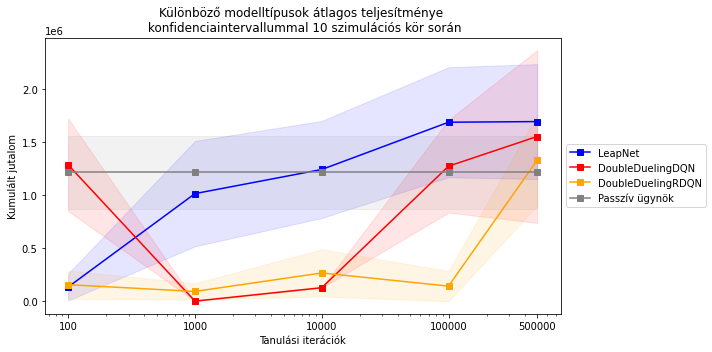

In [20]:
train_iters = [100,1000,10000,100000,500000]
plt.figure(figsize=(10,5))

plt.plot(train_iters, leapnet_means, color='b', marker="s", label="LeapNet")
plt.fill_between(train_iters, (leapnet_means-leapnet_ci), (leapnet_means+leapnet_ci), color='b', alpha=.1)

plt.plot(train_iters, dddqn_means, color='r', marker="s", label="DoubleDuelingDQN")
plt.fill_between(train_iters, (dddqn_means-dddqn_ci), (dddqn_means+dddqn_ci), color='r', alpha=.1)

plt.plot(train_iters, dddrqn_means, color='orange', marker="s", label="DoubleDuelingRDQN")
plt.fill_between(train_iters, (dddrqn_means-dddrqn_ci), (dddrqn_means+dddrqn_ci), color='orange', alpha=.1)

#plt.plot(train_iters, donothing_means, color='purple', marker="s", label="Passzív ügynök")
#plt.fill_between(train_iters, (donothing_means-donothing_ci), (donothing_means+donothing_ci), color='purple', alpha=.1)

plt.plot(train_iters, np.array([donothing_means2]*5), color='grey', marker="s", label="Passzív ügynök")
plt.fill_between(train_iters, np.ones(5)*(donothing_means2-donothing_ci2), np.ones(5)*(donothing_means2+donothing_ci2), color='gray', alpha=.1)


plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)
plt.xlabel("Tanulási iterációk")
plt.ylabel('Kumulált jutalom')
plt.xticks(train_iters,train_iters)
#plt.title(f"Average performance of different model variants \n with confidence interval from {eval_nb_episode} simulation rounds")
plt.title(f"Különböző modelltípusok átlagos teljesítménye \n konfidenciaintervallummal {eval_nb_episode} szimulációs kör során")

plt.tight_layout()
plt.savefig("train_iter_experiment_results.pdf", dpi = 100, bbox_inches='tight')
plt.savefig("train_iter_experiment_results.png", dpi = 100, bbox_inches='tight')
plt.show()